# 9. Machine Learning

![](https://www.datacatchup.com/wp-content/uploads/2019/05/image.png)
![](https://static.javatpoint.com/tutorial/machine-learning/images/difference-between-supervised-and-unsupervised-learning.jpg)
![](https://miro.medium.com/max/1400/1*6iDmbHflsN6NULBLpVHA6A.png)
![](https://scikit-learn.org/stable/_static/ml_map.png)

In [1]:
import os
import pandas as pd

from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
from sklearn.metrics import confusion_matrix

In [2]:
#the model used below is classification, a subset of supervised learning 

## 9.1 Support Vector Classifier (SVC)

In [3]:
covidvisual = pd.read_excel('covidvisualApril5th2023.xlsx')

In [4]:
covidvisual.shape

(149, 43)

In [5]:
covidvisual.head(3)

,Country,Country Code,Latitude,Longitude,HDI rank,Human Development Index 2021 (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,...,NewRecovered,ActiveCases,"Serious,Critical",TotalTests,Population,Continent,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,covid_mortality_rate (per 100000)
0,Albania,ALB,41.0,20.0,67,0.796,76.4626,14.448000,11.286455,14131.110390,...,NaN,"1,709",NaN,"1,941,032",2866374,Europe,NaN,NaN,596,125.663992
1,Algeria,DZA,28.0,3.0,91,0.745,76.3767,14.626896,8.069284,10800.225460,...,NaN,"81,825",NaN,"230,861",45350148,Africa,0.1,NaN,"1,804",15.173049
2,Angola,AGO,-12.5,18.5,148,0.586,61.6434,12.172100,5.417391,5465.617791,...,NaN,41,NaN,"1,499,795",35027343,Africa,NaN,NaN,1,5.518546


In [6]:
covidvisual.isnull().sum()

Country                                     0
Country Code                                0
Latitude                                    0
Longitude                                   0
HDI rank                                    0
Human Development Index 2021 (HDI)          0
Life expectancy at birth                    0
Expected years of schooling                 0
Mean years of schooling                     0
Gross national income (GNI) per capita      0
GDP 2021 (US$)                              0
GDP per capita 2021 (US$)                   0
GDP growth 2021 (annual %)                  0
Inflation Rate 2021 (%)                     0
Unemployment Rate 2021 (%)                  0
Region                                      0
IncomeGroup                                 0
total_vaccinations                          0
date                                        0
people_vaccinated                           0
people_fully_vaccinated                     0
daily_vaccinations_raw            

In [7]:
covidvisual.columns

Index(['Country', 'Country Code', 'Latitude', 'Longitude', 'HDI rank',
       'Human Development Index 2021 (HDI)', 'Life expectancy at birth',
       'Expected years of schooling', 'Mean years of schooling',
       'Gross national income (GNI) per capita', 'GDP 2021 (US$)',
       'GDP per capita 2021 (US$)', 'GDP growth 2021 (annual %)',
       'Inflation Rate 2021 (%)', 'Unemployment Rate 2021 (%)', 'Region',
       'IncomeGroup', 'total_vaccinations', 'date', 'people_vaccinated',
       'people_fully_vaccinated', 'daily_vaccinations_raw',
       'daily_vaccinations', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'daily_vaccinations_per_million', 'Country,Other', 'TotalCases',
       'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered',
       'NewRecovered', 'ActiveCases', 'Serious,Critical', 'TotalTests',
       'Population', 'Continent', 'New Cases/1M pop', 'New Deaths/1M pop',
       'Active Cases/1M p

In [8]:
dataset = covidvisual.loc[:, ['total_vaccinations_per_hundred',
                              'daily_vaccinations_per_million','covid_mortality_rate (per 100000)',
                              'Human Development Index 2021 (HDI)','GDP per capita 2021 (US$)',
                              'IncomeGroup']]

In [9]:
dataset.head(3)

,total_vaccinations_per_hundred,daily_vaccinations_per_million,covid_mortality_rate (per 100000),Human Development Index 2021 (HDI),GDP per capita 2021 (US$),IncomeGroup
0,108.03,6180,125.663992,0.796,6492.872012,Upper middle income
1,34.00,5722,15.173049,0.745,3690.627878,Lower middle income
2,69.88,5147,5.518546,0.586,1953.533757,Lower middle income


In [10]:
dataset = dataset.dropna()

In [11]:
dataset

,total_vaccinations_per_hundred,daily_vaccinations_per_million,covid_mortality_rate (per 100000),Human Development Index 2021 (HDI),GDP per capita 2021 (US$),IncomeGroup
0,108.03,6180,125.663992,0.796,6492.872012,Upper middle income
1,34.00,5722,15.173049,0.745,3690.627878,Lower middle income
2,69.88,5147,5.518546,0.586,1953.533757,Lower middle income
3,77.45,6441,294.047778,0.759,4966.513471,Upper middle income
4,243.27,11302,76.167703,0.951,60443.109165,High income
...,...,...,...,...,...,...
144,218.04,12311,4.761201,0.727,1983.064723,Lower middle income
145,112.21,27064,4.350096,0.607,2996.621062,Lower middle income
146,271.40,17064,43.642703,0.703,3756.489121,Lower middle income
147,63.90,9006,20.842071,0.565,1137.343633,Low income


In [12]:
len(dataset)

149

In [13]:
dataset.shape

(149, 6)

In [14]:
dataset.describe()

,total_vaccinations_per_hundred,daily_vaccinations_per_million,covid_mortality_rate (per 100000),Human Development Index 2021 (HDI),GDP per capita 2021 (US$)
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,147.465973,12556.147651,140.651667,0.737940,17043.642330
std,79.618981,11346.083328,140.407090,0.148244,23472.569989
min,0.280000,32.000000,0.300994,0.400000,221.477676
25%,77.450000,7465.000000,17.799897,0.627000,2535.623432
50%,147.860000,11268.000000,98.920361,0.751000,6104.136709
75%,213.920000,15163.000000,224.750550,0.858000,21391.925334
max,319.780000,117113.000000,652.641143,0.962000,133590.146976


In [15]:
print(dataset.groupby('IncomeGroup').size())

IncomeGroup
High income            49
Low income             16
Lower middle income    44
Upper middle income    40
dtype: int64


In [16]:
dataset.drop(dataset.loc[dataset['IncomeGroup']=='Low income'].index, inplace=True)

In [17]:
print(dataset.groupby('IncomeGroup').size())

IncomeGroup
High income            49
Lower middle income    44
Upper middle income    40
dtype: int64


In [18]:
dataset=dataset.groupby('IncomeGroup', as_index=False, group_keys=False).apply(lambda x: x.sample(n=39))

In [19]:
print(dataset.groupby('IncomeGroup').size())

IncomeGroup
High income            39
Lower middle income    39
Upper middle income    39
dtype: int64


In [20]:
len(dataset)

117

In [21]:
dataset

,total_vaccinations_per_hundred,daily_vaccinations_per_million,covid_mortality_rate (per 100000),Human Development Index 2021 (HDI),GDP per capita 2021 (US$),IncomeGroup
59,167.56,12632,508.116635,0.846,18728.121895,High income
49,230.55,13774,204.055391,0.942,51203.554473,High income
69,309.24,13653,58.925903,0.925,39312.660373,High income
85,258.91,15359,187.373461,0.918,33486.671984,High income
142,202.85,10561,345.176169,0.921,70248.629000,High income
...,...,...,...,...,...,...
88,175.02,12927,253.532968,0.758,10045.680500,Upper middle income
116,68.37,10630,220.946125,0.715,9414.226231,Upper middle income
20,67.99,3987,559.112538,0.795,12221.496606,Upper middle income
135,190.06,18958,12.065077,0.745,4426.000637,Upper middle income


In [22]:
#datasetrand = dataset.sample(frac=1)
#The frac keyword argument specifies the fraction of rows to return in the random sample, so frac=1 means return all rows (in random order)
#but in order to work in my case it needs to be in order like it is and not shuffled, otherwise it won't run later

In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [24]:
dummie_class = pd.get_dummies(dataset['IncomeGroup'],prefix='IncomeGroup')

In [25]:
dummie_class

,IncomeGroup_High income,IncomeGroup_Lower middle income,IncomeGroup_Upper middle income
59,1,0,0
49,1,0,0
69,1,0,0
85,1,0,0
142,1,0,0
...,...,...,...
88,0,0,1
116,0,0,1
20,0,0,1
135,0,0,1


In [26]:
Y = dummie_class['IncomeGroup_High income']

In [27]:
Y.sample(n=10) # 1 is high income, 0 it's not

61     0
49     1
145    0
78     1
30     0
123    1
88     0
2      0
117    0
56     0
Name: IncomeGroup_High income, dtype: uint8

In [28]:
X = dataset[['total_vaccinations_per_hundred',
            'daily_vaccinations_per_million',
             'covid_mortality_rate (per 100000)',
            'Human Development Index 2021 (HDI)','GDP per capita 2021 (US$)']] 
X = sm.add_constant(X)

In [29]:
X

,const,total_vaccinations_per_hundred,daily_vaccinations_per_million,covid_mortality_rate (per 100000),Human Development Index 2021 (HDI),GDP per capita 2021 (US$)
59,1.0,167.56,12632,508.116635,0.846,18728.121895
49,1.0,230.55,13774,204.055391,0.942,51203.554473
69,1.0,309.24,13653,58.925903,0.925,39312.660373
85,1.0,258.91,15359,187.373461,0.918,33486.671984
142,1.0,202.85,10561,345.176169,0.921,70248.629000
...,...,...,...,...,...,...
88,1.0,175.02,12927,253.532968,0.758,10045.680500
116,1.0,68.37,10630,220.946125,0.715,9414.226231
20,1.0,67.99,3987,559.112538,0.795,12221.496606
135,1.0,190.06,18958,12.065077,0.745,4426.000637


In [30]:
probit_mod = sm.Probit(Y, X)

In [31]:
probit_res = probit_mod.fit()

         Current function value: 0.000000
         Iterations: 35


C:\Users\andre\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [32]:
print(probit_res.summary2())

                                            Results: Probit
Model:                        Probit                            Pseudo R-squared:           inf        
Dependent Variable:           IncomeGroup_High income           AIC:                        12.0000    
Date:                         2023-04-16 20:16                  BIC:                        28.5730    
No. Observations:             117                               Log-Likelihood:             -1.4877e-14
Df Model:                     5                                 LL-Null:                    0.0000     
Df Residuals:                 111                               LLR p-value:                1.0000     
Converged:                    0.0000                            Scale:                      1.0000     
No. Iterations:               35.0000                                                                  
-------------------------------------------------------------------------------------------------------
    

C:\Users\andre\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3511: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [33]:
print(probit_res.get_margeff(at='overall', method='dydx').summary())

         Probit Marginal Effects          
Dep. Variable:     IncomeGroup_High income
Method:                               dydx
At:                                overall
                                        dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
total_vaccinations_per_hundred       1.58e-10      0.038   4.18e-09      1.000      -0.074       0.074
daily_vaccinations_per_million      2.227e-11      0.007   3.27e-09      1.000      -0.013       0.013
covid_mortality_rate (per 100000)   4.479e-10      0.134   3.35e-09      1.000      -0.262       0.262
Human Development Index 2021 (HDI)  4.908e-08     27.723   1.77e-09      1.000     -54.335      54.335
GDP per capita 2021 (US$)          -1.794e-13   6.76e-05  -2.65e-09      1.000      -0.000       0.000


In [34]:
X.head(3)

,const,total_vaccinations_per_hundred,daily_vaccinations_per_million,covid_mortality_rate (per 100000),Human Development Index 2021 (HDI),GDP per capita 2021 (US$)
59,1.0,167.56,12632,508.116635,0.846,18728.121895
49,1.0,230.55,13774,204.055391,0.942,51203.554473
69,1.0,309.24,13653,58.925903,0.925,39312.660373


In [35]:
predictions = probit_res.predict(X)
print(predictions[15:30])

143    1.0
25     1.0
112    1.0
119    1.0
105    1.0
67     1.0
60     1.0
34     1.0
11     1.0
45     1.0
42     1.0
19     1.0
79     1.0
51     1.0
111    1.0
dtype: float64


In [36]:
Y[15:30]

143    1
25     1
112    1
119    1
105    1
67     1
60     1
34     1
11     1
45     1
42     1
19     1
79     1
51     1
111    1
Name: IncomeGroup_High income, dtype: uint8

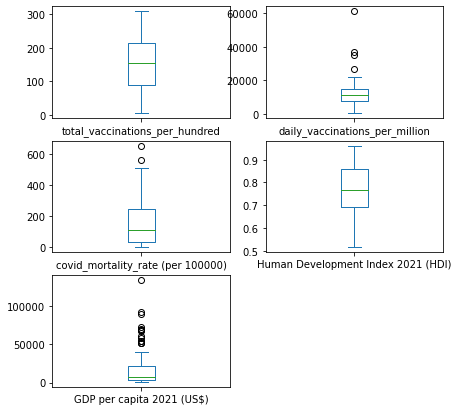

In [37]:
dataset.plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False, figsize=(7, 7))
plt.show()

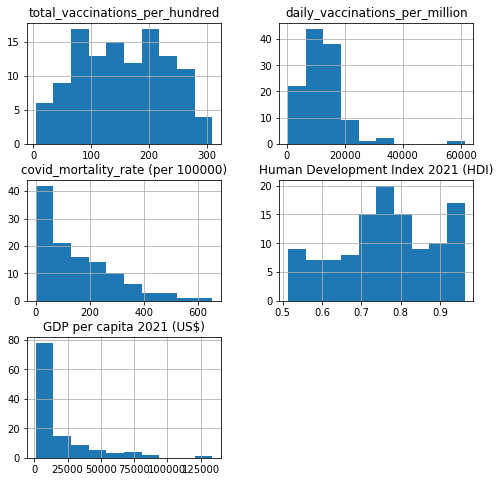

In [38]:
dataset.hist(figsize=(8, 8))
plt.show()

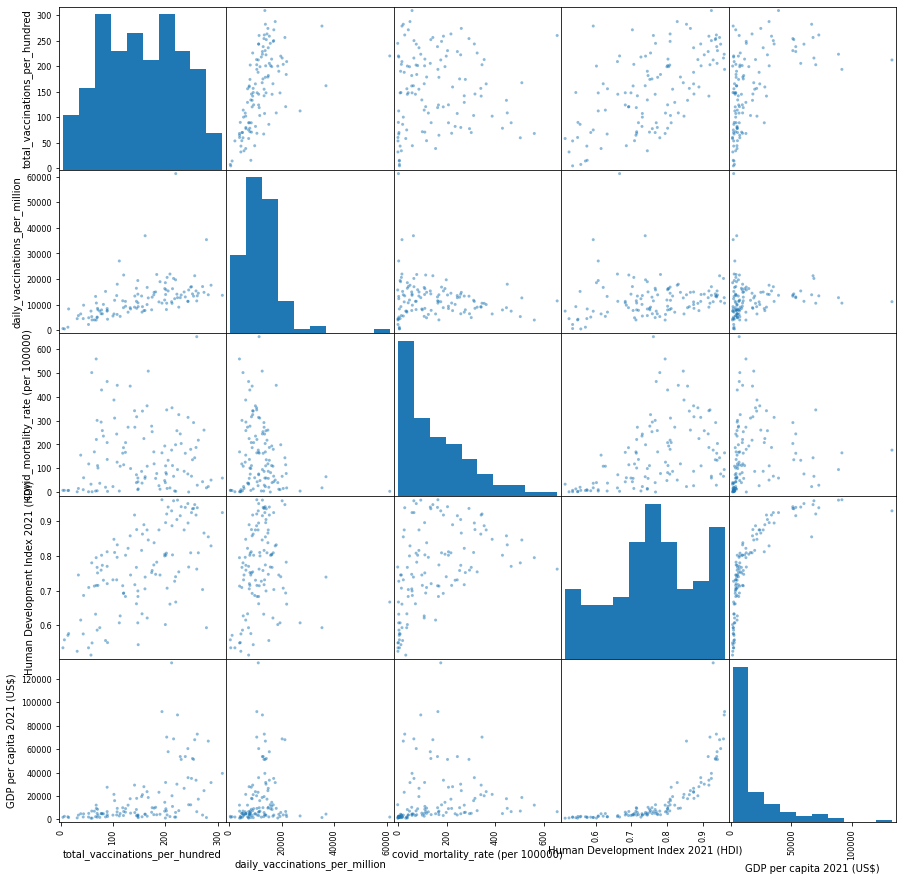

In [39]:
scatter_matrix(dataset, figsize=(15,15))
plt.show()

In [40]:
dataset

,total_vaccinations_per_hundred,daily_vaccinations_per_million,covid_mortality_rate (per 100000),Human Development Index 2021 (HDI),GDP per capita 2021 (US$),IncomeGroup
59,167.56,12632,508.116635,0.846,18728.121895,High income
49,230.55,13774,204.055391,0.942,51203.554473,High income
69,309.24,13653,58.925903,0.925,39312.660373,High income
85,258.91,15359,187.373461,0.918,33486.671984,High income
142,202.85,10561,345.176169,0.921,70248.629000,High income
...,...,...,...,...,...,...
88,175.02,12927,253.532968,0.758,10045.680500,Upper middle income
116,68.37,10630,220.946125,0.715,9414.226231,Upper middle income
20,67.99,3987,559.112538,0.795,12221.496606,Upper middle income
135,190.06,18958,12.065077,0.745,4426.000637,Upper middle income


In [41]:
dataset.values

array([[167.56, 12632, 508.1166352062754, 0.846, 18728.12189486889,
        'High income'],
       [230.55, 13774, 204.0553912352542, 0.942, 51203.55447310433,
        'High income'],
       [309.24, 13653, 58.92590314126932, 0.925, 39312.66037306932,
        'High income'],
       [258.91, 15359, 187.3734609815036, 0.918, 33486.67198385498,
        'High income'],
       [202.85, 10561, 345.1761686582059, 0.921, 70248.62900022416,
        'High income'],
       [154.84, 13367, 86.9272367563218, 0.816, 19509.46646338666,
        'High income'],
       [165.28, 10041, 362.2486012740691, 0.875, 23723.34025103447,
        'High income'],
       [101.96, 6362, 386.7079423749307, 0.848, 21391.92533360423,
        'High income'],
       [228.73, 12715, 244.3775084898491, 0.916, 53637.70571098969,
        'High income'],
       [200.74, 13965, 110.2676422097014, 0.896, 31551.81640625,
        'High income'],
       [145.42, 8564, 316.3531535751992, 0.876, 17999.90994954462,
        'High inco

In [42]:
array = dataset.values

In [43]:
array

array([[167.56, 12632, 508.1166352062754, 0.846, 18728.12189486889,
        'High income'],
       [230.55, 13774, 204.0553912352542, 0.942, 51203.55447310433,
        'High income'],
       [309.24, 13653, 58.92590314126932, 0.925, 39312.66037306932,
        'High income'],
       [258.91, 15359, 187.3734609815036, 0.918, 33486.67198385498,
        'High income'],
       [202.85, 10561, 345.1761686582059, 0.921, 70248.62900022416,
        'High income'],
       [154.84, 13367, 86.9272367563218, 0.816, 19509.46646338666,
        'High income'],
       [165.28, 10041, 362.2486012740691, 0.875, 23723.34025103447,
        'High income'],
       [101.96, 6362, 386.7079423749307, 0.848, 21391.92533360423,
        'High income'],
       [228.73, 12715, 244.3775084898491, 0.916, 53637.70571098969,
        'High income'],
       [200.74, 13965, 110.2676422097014, 0.896, 31551.81640625,
        'High income'],
       [145.42, 8564, 316.3531535751992, 0.876, 17999.90994954462,
        'High inco

In [44]:
X = array[:,0:5]

In [45]:
X

array([[167.56, 12632, 508.1166352062754, 0.846, 18728.12189486889],
       [230.55, 13774, 204.0553912352542, 0.942, 51203.55447310433],
       [309.24, 13653, 58.92590314126932, 0.925, 39312.66037306932],
       [258.91, 15359, 187.3734609815036, 0.918, 33486.67198385498],
       [202.85, 10561, 345.1761686582059, 0.921, 70248.62900022416],
       [154.84, 13367, 86.9272367563218, 0.816, 19509.46646338666],
       [165.28, 10041, 362.2486012740691, 0.875, 23723.34025103447],
       [101.96, 6362, 386.7079423749307, 0.848, 21391.92533360423],
       [228.73, 12715, 244.3775084898491, 0.916, 53637.70571098969],
       [200.74, 13965, 110.2676422097014, 0.896, 31551.81640625],
       [145.42, 8564, 316.3531535751992, 0.876, 17999.90994954462],
       [223.5, 12724, 94.58628253955006, 0.961, 89154.2760934922],
       [193.77, 10594, 164.7207423785598, 0.962, 91991.60045835626],
       [256.36, 21284, 144.0800692379541, 0.948, 68007.75667329543],
       [205.56, 15350, 133.5855143382192, 

In [46]:
Y = array[:,5]

In [47]:
Y

array(['High income', 'High income', 'High income', 'High income',
       'High income', 'High income', 'High income', 'High income',
       'High income', 'High income', 'High income', 'High income',
       'High income', 'High income', 'High income', 'High income',
       'High income', 'High income', 'High income', 'High income',
       'High income', 'High income', 'High income', 'High income',
       'High income', 'High income', 'High income', 'High income',
       'High income', 'High income', 'High income', 'High income',
       'High income', 'High income', 'High income', 'High income',
       'High income', 'High income', 'High income', 'Lower middle income',
       'Lower middle income', 'Lower middle income',
       'Lower middle income', 'Lower middle income',
       'Lower middle income', 'Lower middle income',
       'Lower middle income', 'Lower middle income',
       'Lower middle income', 'Lower middle income',
       'Lower middle income', 'Lower middle income',
    

In [48]:
validation_size = 0.2 #it sets 80% to train 20% to test, the default is 75% train 25% test
seed = 8
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [49]:
X_train[0:5]

array([[159.21, 7663, 224.7505503400383, 0.89, 27943.70121988203],
       [223.5, 12724, 94.58628253955006, 0.961, 89154.2760934922],
       [258.91, 15359, 187.3734609815036, 0.918, 33486.67198385498],
       [248.7, 16861, 179.6287941734586, 0.809, 12472.44372949542],
       [120.18, 8817, 186.5725157129497, 0.692, 3345.196588738308]],
      dtype=object)

In [50]:
Y_train[0:5]

array(['High income', 'High income', 'High income', 'Upper middle income',
       'Lower middle income'], dtype=object)

In [51]:
len(X_train)

93

In [52]:
len(X_validation)

24

In [53]:
len(Y_train)

93

In [54]:
len(Y_validation)

24

In [55]:
X[0:5]

array([[167.56, 12632, 508.1166352062754, 0.846, 18728.12189486889],
       [230.55, 13774, 204.0553912352542, 0.942, 51203.55447310433],
       [309.24, 13653, 58.92590314126932, 0.925, 39312.66037306932],
       [258.91, 15359, 187.3734609815036, 0.918, 33486.67198385498],
       [202.85, 10561, 345.1761686582059, 0.921, 70248.62900022416]],
      dtype=object)

In [56]:
Y[0:5]

array(['High income', 'High income', 'High income', 'High income',
       'High income'], dtype=object)

In [57]:
print('Training')
print('    X_training size:', len(X_train))
print('    Y_training size:', len(Y_train))
print('Validation')
print('    X_validation size:', len(X_validation))
print('    Y_validation size:', len(Y_validation))

Training
    X_training size: 93
    Y_training size: 93
Validation
    X_validation size: 24
    Y_validation size: 24


In [58]:
svm = SVC(probability=True) #training the model
#svm = SVC()
svm.fit(X_train, Y_train)

SVC(probability=True)

In [59]:
svm

SVC(probability=True)

In [60]:
predictions = svm.predict(X_validation) #making the predictions
print(predictions)

['Lower middle income' 'High income' 'High income' 'Lower middle income'
 'Upper middle income' 'Upper middle income' 'Lower middle income'
 'Upper middle income' 'High income' 'High income' 'Lower middle income'
 'Lower middle income' 'High income' 'Upper middle income' 'High income'
 'Lower middle income' 'High income' 'Upper middle income'
 'Lower middle income' 'Upper middle income' 'Upper middle income'
 'High income' 'Upper middle income' 'Lower middle income']


In [61]:
print(Y_validation) #what the true outcome is

['Upper middle income' 'High income' 'High income' 'Lower middle income'
 'Upper middle income' 'Upper middle income' 'Lower middle income'
 'Upper middle income' 'High income' 'High income' 'Lower middle income'
 'Lower middle income' 'High income' 'Upper middle income' 'High income'
 'Lower middle income' 'High income' 'Upper middle income'
 'Lower middle income' 'Upper middle income' 'Upper middle income'
 'High income' 'Upper middle income' 'Upper middle income']


In [62]:
#comparing the true outcome (validation) with the predictions
print(accuracy_score(Y_validation, predictions)) 

0.9166666666666666


In [63]:
dataset.head(3)

,total_vaccinations_per_hundred,daily_vaccinations_per_million,covid_mortality_rate (per 100000),Human Development Index 2021 (HDI),GDP per capita 2021 (US$),IncomeGroup
59,167.56,12632,508.116635,0.846,18728.121895,High income
49,230.55,13774,204.055391,0.942,51203.554473,High income
69,309.24,13653,58.925903,0.925,39312.660373,High income


In [64]:
dataset.max()

total_vaccinations_per_hundred                     309.24
daily_vaccinations_per_million                      61197
covid_mortality_rate (per 100000)              652.641143
Human Development Index 2021 (HDI)                  0.962
GDP per capita 2021 (US$)                   133590.146976
IncomeGroup                           Upper middle income
dtype: object

In [65]:
dataset.min()

total_vaccinations_per_hundred               4.45
daily_vaccinations_per_million                512
covid_mortality_rate (per 100000)         0.36397
Human Development Index 2021 (HDI)          0.514
GDP per capita 2021 (US$)             1094.098185
IncomeGroup                           High income
dtype: object

In [66]:
dataset.describe() 

,total_vaccinations_per_hundred,daily_vaccinations_per_million,covid_mortality_rate (per 100000),Human Development Index 2021 (HDI),GDP per capita 2021 (US$)
count,117.000000,117.000000,117.000000,117.000000,117.000000
mean,154.217265,12214.777778,153.945255,0.762513,17499.696475
std,74.862689,7535.319356,142.430879,0.120768,23173.542050
min,4.450000,512.000000,0.363970,0.514000,1094.098185
25%,88.970000,7773.000000,37.743780,0.692000,3698.834981
50%,155.700000,11297.000000,111.455109,0.767000,7055.044776
75%,213.920000,14945.000000,243.743990,0.858000,21391.925334
max,309.240000,61197.000000,652.641143,0.962000,133590.146976


In [67]:
svm.predict([[6.0, 600 , 60, 0.6, 6000]])

array(['Lower middle income'], dtype=object)

In [68]:
svm.predict_proba([[6.0, 600 , 60, 0.6, 6000]])

array([[0.05209198, 0.40758963, 0.54031839]])

In [69]:
dataset.IncomeGroup

59             High income
49             High income
69             High income
85             High income
142            High income
              ...         
88     Upper middle income
116    Upper middle income
20     Upper middle income
135    Upper middle income
55     Upper middle income
Name: IncomeGroup, Length: 117, dtype: object

In [70]:
labels = ['High income','Lower Middle income','Upper middle income']
cm = confusion_matrix(Y_validation, predictions)
print(cm)

[[8 0 0]
 [0 6 0]
 [0 2 8]]


<ipython-input-71-4eb4716b0a1e>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] +labels)
<ipython-input-71-4eb4716b0a1e>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


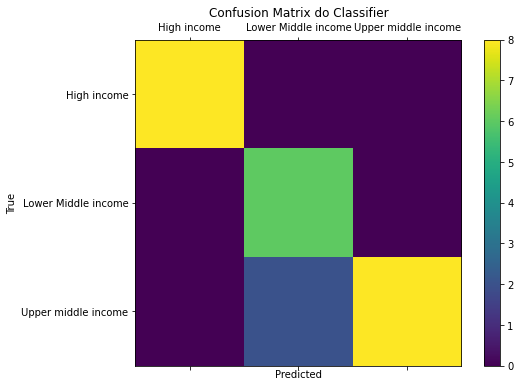

In [71]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix do Classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] +labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [72]:
probs = svm.predict_proba(X_validation)
print(probs)
#probability associated to each observation

[[0.02538851 0.51043988 0.46417161]
 [0.98668233 0.00243655 0.01088112]
 [0.96809934 0.02394082 0.00795985]
 [0.01165998 0.95789536 0.03044466]
 [0.0244778  0.16276879 0.81275341]
 [0.21772722 0.03474832 0.74752446]
 [0.0186639  0.95867404 0.02266207]
 [0.05220473 0.0164749  0.93132037]
 [0.99315657 0.00156341 0.00528003]
 [0.99366975 0.0041341  0.00219615]
 [0.0134359  0.9644229  0.0221412 ]
 [0.01661269 0.97040099 0.01298632]
 [0.87455414 0.01297444 0.11247142]
 [0.2834738  0.05118213 0.66534407]
 [0.962913   0.02898923 0.00809778]
 [0.02269131 0.83874111 0.13856758]
 [0.96119164 0.0066433  0.03216507]
 [0.05374301 0.01909737 0.92715962]
 [0.01365898 0.95008367 0.03625735]
 [0.04620222 0.09926521 0.85453257]
 [0.08425281 0.02018753 0.89555966]
 [0.99601426 0.00133787 0.00264787]
 [0.03227891 0.04600624 0.92171485]
 [0.02207919 0.69314615 0.28477466]]


In [73]:
#it's possible to make one prediction 

In [74]:
Data = [[7.0, 578 , 55, 0.6, 5000]]
pred_data = svm.predict(Data)
print(pred_data)

['Lower middle income']


In [75]:
#or many at once

In [76]:
Data = [[5.5, 550, 80, 0.59, 15000], [6.4, 400, 60, 0.57, 9500]]
pred_data = svm.predict(Data)
print(pred_data)

['High income' 'Upper middle income']


In [77]:
dataset.describe() 

,total_vaccinations_per_hundred,daily_vaccinations_per_million,covid_mortality_rate (per 100000),Human Development Index 2021 (HDI),GDP per capita 2021 (US$)
count,117.000000,117.000000,117.000000,117.000000,117.000000
mean,154.217265,12214.777778,153.945255,0.762513,17499.696475
std,74.862689,7535.319356,142.430879,0.120768,23173.542050
min,4.450000,512.000000,0.363970,0.514000,1094.098185
25%,88.970000,7773.000000,37.743780,0.692000,3698.834981
50%,155.700000,11297.000000,111.455109,0.767000,7055.044776
75%,213.920000,14945.000000,243.743990,0.858000,21391.925334
max,309.240000,61197.000000,652.641143,0.962000,133590.146976


## 9.2 Logistic Regression, Decision Tree and Random Forest

In [78]:
#making predictions in a different ways, this will also be classification, but not SVC

In [79]:
covidvisual = pd.read_excel('covidvisualApril5th2023.xlsx')

In [80]:
covidvisual

,Country,Country Code,Latitude,Longitude,HDI rank,Human Development Index 2021 (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,...,NewRecovered,ActiveCases,"Serious,Critical",TotalTests,Population,Continent,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,covid_mortality_rate (per 100000)
0,Albania,ALB,41.0,20.0,67,0.796,76.4626,14.448000,11.286455,14131.110390,...,NaN,"1,709",NaN,"1,941,032",2866374,Europe,NaN,NaN,596,125.663992
1,Algeria,DZA,28.0,3.0,91,0.745,76.3767,14.626896,8.069284,10800.225460,...,NaN,"81,825",NaN,"230,861",45350148,Africa,0.1,NaN,"1,804",15.173049
2,Angola,AGO,-12.5,18.5,148,0.586,61.6434,12.172100,5.417391,5465.617791,...,NaN,41,NaN,"1,499,795",35027343,Africa,NaN,NaN,1,5.518546
3,Armenia,ARM,40.0,45.0,85,0.759,72.0431,13.116760,11.330300,13157.993900,...,NaN,"4,250",NaN,"3,242,901",2971966,Asia,NaN,NaN,"1,430",294.047778
4,Australia,AUS,-27.0,133.0,5,0.951,84.5265,21.054590,12.726820,49238.433350,...,NaN,"43,652",33,"78,835,048",26068792,Australia/Oceania,NaN,NaN,"1,674",76.167703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Uzbekistan,UZB,41.0,64.0,101,0.727,70.8616,12.477140,11.895590,7916.785725,...,NaN,"8,716",23,"1,377,915",34382084,Asia,NaN,NaN,254,4.761201
145,Vanuatu,VUT,-16.0,167.0,140,0.607,70.4490,11.535315,7.064846,3085.411633,...,NaN,24,NaN,"24,976",321832,Australia/Oceania,NaN,NaN,75,4.350096
146,Viet Nam,VNM,16.0,106.0,115,0.703,73.6181,12.951932,8.370280,7867.371345,...,+23,"869,254",7,"85,826,548",98953541,Asia,0.5,NaN,"8,784",43.642703
147,Zambia,ZMB,-15.0,30.0,154,0.565,61.2234,10.928760,7.187091,3217.767739,...,NaN,122,NaN,"3,994,061",19470234,Africa,NaN,NaN,6,20.842071


In [81]:
covidvisual.head(3)

,Country,Country Code,Latitude,Longitude,HDI rank,Human Development Index 2021 (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,...,NewRecovered,ActiveCases,"Serious,Critical",TotalTests,Population,Continent,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,covid_mortality_rate (per 100000)
0,Albania,ALB,41.0,20.0,67,0.796,76.4626,14.448000,11.286455,14131.110390,...,NaN,"1,709",NaN,"1,941,032",2866374,Europe,NaN,NaN,596,125.663992
1,Algeria,DZA,28.0,3.0,91,0.745,76.3767,14.626896,8.069284,10800.225460,...,NaN,"81,825",NaN,"230,861",45350148,Africa,0.1,NaN,"1,804",15.173049
2,Angola,AGO,-12.5,18.5,148,0.586,61.6434,12.172100,5.417391,5465.617791,...,NaN,41,NaN,"1,499,795",35027343,Africa,NaN,NaN,1,5.518546


In [82]:
covidvisual.shape

(149, 43)

In [83]:
covidvisual.isna().sum()

Country                                     0
Country Code                                0
Latitude                                    0
Longitude                                   0
HDI rank                                    0
Human Development Index 2021 (HDI)          0
Life expectancy at birth                    0
Expected years of schooling                 0
Mean years of schooling                     0
Gross national income (GNI) per capita      0
GDP 2021 (US$)                              0
GDP per capita 2021 (US$)                   0
GDP growth 2021 (annual %)                  0
Inflation Rate 2021 (%)                     0
Unemployment Rate 2021 (%)                  0
Region                                      0
IncomeGroup                                 0
total_vaccinations                          0
date                                        0
people_vaccinated                           0
people_fully_vaccinated                     0
daily_vaccinations_raw            

In [84]:
import missingno as msno

<AxesSubplot:>

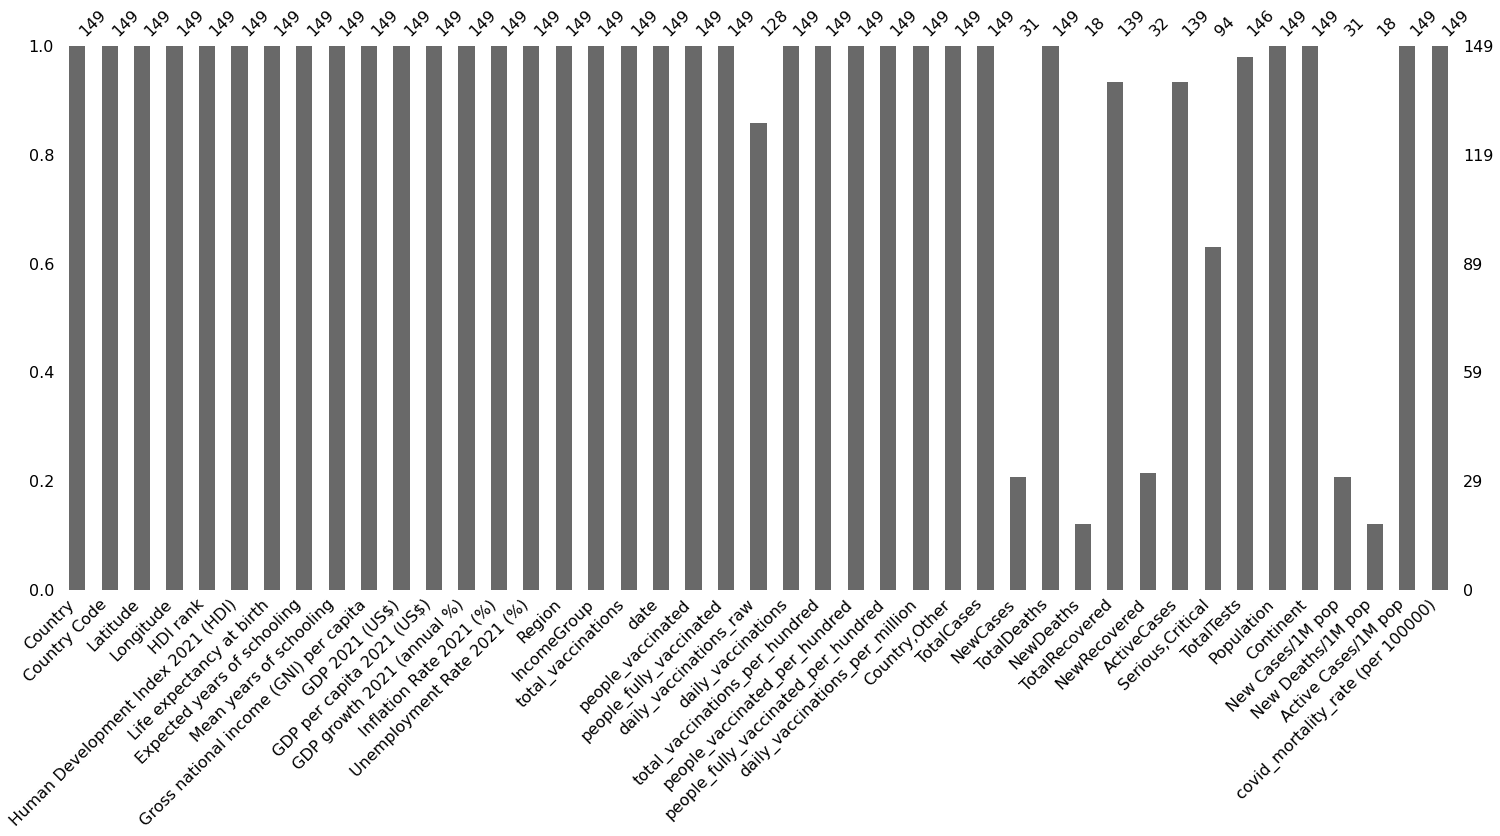

In [85]:
msno.bar(covidvisual)

In [86]:
covidvisual.nunique()

Country                                   149
Country Code                              149
Latitude                                  107
Longitude                                 111
HDI rank                                  128
Human Development Index 2021 (HDI)        128
Life expectancy at birth                  149
Expected years of schooling               149
Mean years of schooling                   149
Gross national income (GNI) per capita    149
GDP 2021 (US$)                            149
GDP per capita 2021 (US$)                 149
GDP growth 2021 (annual %)                149
Inflation Rate 2021 (%)                   149
Unemployment Rate 2021 (%)                145
Region                                      7
IncomeGroup                                 4
total_vaccinations                        149
date                                       75
people_vaccinated                         149
people_fully_vaccinated                   149
daily_vaccinations_raw            

In [87]:
covidvisual.dtypes

Country                                    object
Country Code                               object
Latitude                                  float64
Longitude                                 float64
HDI rank                                    int64
Human Development Index 2021 (HDI)        float64
Life expectancy at birth                  float64
Expected years of schooling               float64
Mean years of schooling                   float64
Gross national income (GNI) per capita    float64
GDP 2021 (US$)                            float64
GDP per capita 2021 (US$)                 float64
GDP growth 2021 (annual %)                float64
Inflation Rate 2021 (%)                   float64
Unemployment Rate 2021 (%)                float64
Region                                     object
IncomeGroup                                object
total_vaccinations                          int64
date                                       object
people_vaccinated                           int64


In [88]:
type(covidvisual)

pandas.core.frame.DataFrame

In [89]:
type(covidvisual['IncomeGroup'])

pandas.core.series.Series

In [90]:
covidvisual['IncomeGroup'].value_counts()

High income            49
Lower middle income    44
Upper middle income    40
Low income             16
Name: IncomeGroup, dtype: int64

In [91]:
covidvisual['IncomeGroup'].value_counts(normalize=True)

High income            0.328859
Lower middle income    0.295302
Upper middle income    0.268456
Low income             0.107383
Name: IncomeGroup, dtype: float64

In [92]:
import seaborn as sns

<AxesSubplot:xlabel='count', ylabel='IncomeGroup'>

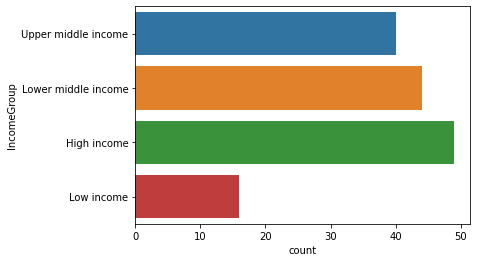

In [93]:
sns.countplot(data=covidvisual, y = 'IncomeGroup')

In [94]:
covidvisual.describe()

,Latitude,Longitude,HDI rank,Human Development Index 2021 (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GDP 2021 (US$),GDP per capita 2021 (US$),...,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,TotalDeaths,NewDeaths,Population,New Cases/1M pop,New Deaths/1M pop,covid_mortality_rate (per 100000)
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,...,149.000000,149.000000,149.000000,149.000000,1.490000e+02,18.000000,1.490000e+02,31.000000,18.000000,149.000000
mean,20.568903,18.110738,89.590604,0.737940,72.099044,13.872340,9.282668,21483.297314,6.267643e+11,17043.642330,...,147.465973,61.090268,56.137584,12556.147651,4.424775e+04,10.222222,4.966243e+07,50.808065,0.331667,140.651667
std,24.937936,65.261616,55.154576,0.148244,7.600011,2.858387,3.145162,20484.572503,2.471488e+12,23472.569989,...,79.618981,23.674900,24.003123,11346.083328,1.286413e+05,14.901858,1.698311e+08,65.684372,0.317143,140.407090
min,-41.000000,-175.000000,1.000000,0.400000,52.676000,6.957112,2.114962,731.786709,4.692313e+08,221.477676,...,0.280000,0.260000,0.260000,32.000000,1.300000e+01,1.000000,1.077490e+05,0.050000,0.010000,0.300994
25%,4.500000,-8.000000,40.000000,0.627000,67.239800,12.087473,7.088480,5472.104781,1.609182e+10,2535.623432,...,77.450000,42.720000,37.800000,7465.000000,1.298000e+03,1.250000,3.249317e+06,3.000000,0.100000,17.799897
50%,20.000000,20.000000,89.000000,0.751000,72.614600,13.951780,9.827750,13157.993900,6.360510e+10,6104.136709,...,147.860000,65.550000,62.310000,11268.000000,7.100000e+03,4.500000,1.021897e+07,22.000000,0.200000,98.920361
75%,41.000000,45.000000,135.000000,0.858000,77.198200,15.928960,11.895590,32803.234230,3.661376e+11,21391.925334,...,213.920000,80.610000,75.190000,15163.000000,2.537500e+04,11.750000,3.502734e+07,78.500000,0.475000,224.750550
max,65.000000,175.000000,189.000000,0.962000,85.473400,21.054590,14.090967,90918.644710,2.331508e+13,133590.146976,...,319.780000,105.820000,105.820000,117113.000000,1.155668e+06,58.000000,1.448471e+09,282.000000,1.000000,652.641143


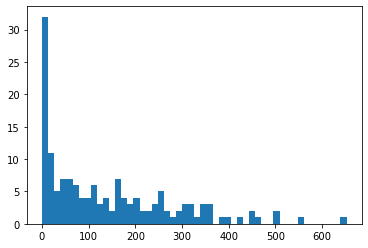

In [95]:
covidvisual['covid_mortality_rate (per 100000)'].hist(grid=False, bins=50);

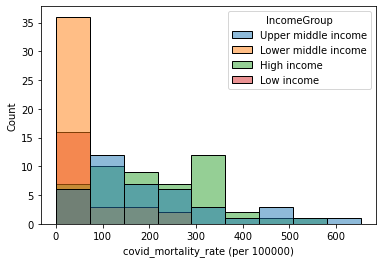

In [96]:
sns.histplot(data=covidvisual, x = 'covid_mortality_rate (per 100000)', hue='IncomeGroup');

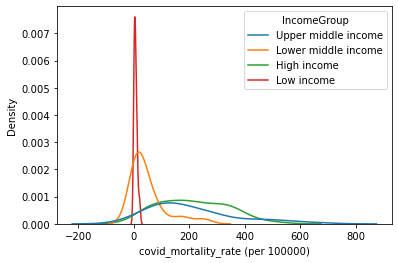

In [97]:
sns.kdeplot(data=covidvisual,x='covid_mortality_rate (per 100000)', hue='IncomeGroup');

In [98]:
pd.crosstab(covidvisual['Continent'], covidvisual['IncomeGroup'], margins=True)

IncomeGroup,High income,Low income,Lower middle income,Upper middle income,All
Continent,,,,,
Africa,0,16,17,4,37
Asia,11,0,17,10,38
Australia/Oceania,2,0,4,2,8
Europe,29,0,1,9,39
North America,5,0,4,8,17
South America,2,0,1,7,10
All,49,16,44,40,149


In [99]:
pd.crosstab(covidvisual['Continent'], covidvisual['IncomeGroup'], normalize='index')

IncomeGroup,High income,Low income,Lower middle income,Upper middle income
Continent,,,,
Africa,0.000000,0.432432,0.459459,0.108108
Asia,0.289474,0.000000,0.447368,0.263158
Australia/Oceania,0.250000,0.000000,0.500000,0.250000
Europe,0.743590,0.000000,0.025641,0.230769
North America,0.294118,0.000000,0.235294,0.470588
South America,0.200000,0.000000,0.100000,0.700000


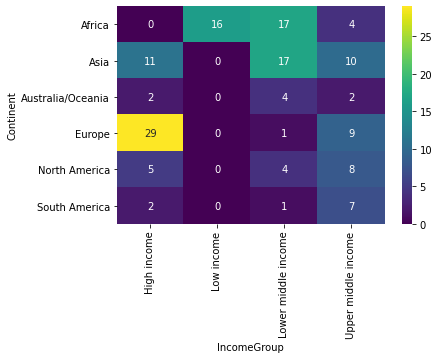

In [100]:
sns.heatmap(pd.crosstab(covidvisual['Continent'], covidvisual['IncomeGroup']), annot=True, fmt='.5g', cmap='viridis');

In [101]:
covidvisual = covidvisual.dropna(subset=['daily_vaccinations_per_million','covid_mortality_rate (per 100000)'])

In [102]:
incomegroupdummies = pd.get_dummies(covidvisual['IncomeGroup'], prefix='IncomeGroup')

In [103]:
incomegroupdummies 

,IncomeGroup_High income,IncomeGroup_Low income,IncomeGroup_Lower middle income,IncomeGroup_Upper middle income
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
...,...,...,...,...
144,0,0,1,0
145,0,0,1,0
146,0,0,1,0
147,0,1,0,0


In [104]:
covidvisual.shape

(149, 43)

In [105]:
covidvisual.isna().sum()

Country                                     0
Country Code                                0
Latitude                                    0
Longitude                                   0
HDI rank                                    0
Human Development Index 2021 (HDI)          0
Life expectancy at birth                    0
Expected years of schooling                 0
Mean years of schooling                     0
Gross national income (GNI) per capita      0
GDP 2021 (US$)                              0
GDP per capita 2021 (US$)                   0
GDP growth 2021 (annual %)                  0
Inflation Rate 2021 (%)                     0
Unemployment Rate 2021 (%)                  0
Region                                      0
IncomeGroup                                 0
total_vaccinations                          0
date                                        0
people_vaccinated                           0
people_fully_vaccinated                     0
daily_vaccinations_raw            

In [106]:
covidvisual.head(3)

,Country,Country Code,Latitude,Longitude,HDI rank,Human Development Index 2021 (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,...,NewRecovered,ActiveCases,"Serious,Critical",TotalTests,Population,Continent,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,covid_mortality_rate (per 100000)
0,Albania,ALB,41.0,20.0,67,0.796,76.4626,14.448000,11.286455,14131.110390,...,NaN,"1,709",NaN,"1,941,032",2866374,Europe,NaN,NaN,596,125.663992
1,Algeria,DZA,28.0,3.0,91,0.745,76.3767,14.626896,8.069284,10800.225460,...,NaN,"81,825",NaN,"230,861",45350148,Africa,0.1,NaN,"1,804",15.173049
2,Angola,AGO,-12.5,18.5,148,0.586,61.6434,12.172100,5.417391,5465.617791,...,NaN,41,NaN,"1,499,795",35027343,Africa,NaN,NaN,1,5.518546


In [107]:
from sklearn.model_selection import train_test_split

In [108]:
x = covidvisual[['total_vaccinations_per_hundred',
            'daily_vaccinations_per_million',
             'covid_mortality_rate (per 100000)',
            'Human Development Index 2021 (HDI)','GDP per capita 2021 (US$)']]
y = incomegroupdummies['IncomeGroup_High income']

In [109]:
x.head(3)

,total_vaccinations_per_hundred,daily_vaccinations_per_million,covid_mortality_rate (per 100000),Human Development Index 2021 (HDI),GDP per capita 2021 (US$)
0,108.03,6180,125.663992,0.796,6492.872012
1,34.00,5722,15.173049,0.745,3690.627878
2,69.88,5147,5.518546,0.586,1953.533757


In [110]:
x.isna().sum()

total_vaccinations_per_hundred        0
daily_vaccinations_per_million        0
covid_mortality_rate (per 100000)     0
Human Development Index 2021 (HDI)    0
GDP per capita 2021 (US$)             0
dtype: int64

In [111]:
y.head(10) #1 it's in the high income group, 0 it's not in the high income group

0    0
1    0
2    0
3    0
4    1
5    1
6    0
7    1
8    1
9    0
Name: IncomeGroup_High income, dtype: uint8

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=8) #by default from the library train is 75% test is 25%

In [113]:
x_train.shape, x_test.shape

((111, 5), (38, 5))

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
lr = LogisticRegression(solver='liblinear')

In [116]:
lr.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [117]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def classification_results(classifier, x_test, y_test, cmap='Blues'):
    print('Model Results:', classifier.__class__.__name__)
    
    y_pred = classifier.predict(x_test)
    
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    cmd = ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)
    cmd.plot(cmap=cmap);

Model Results: LogisticRegression
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        27
           1       0.79      1.00      0.88        11

    accuracy                           0.92        38
   macro avg       0.89      0.94      0.91        38
weighted avg       0.94      0.92      0.92        38



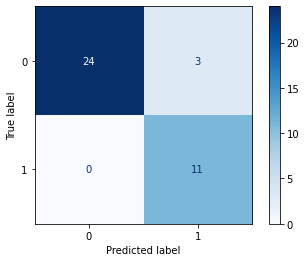

In [118]:
classification_results(lr, x_test, y_test)
plt.grid(False)

In [119]:
from sklearn.tree import DecisionTreeClassifier

In [120]:
dt = DecisionTreeClassifier()

In [121]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [122]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def classification_results(classifier, x_test, y_test, cmap='Blues'):
    print('Model Results:', classifier.__class__.__name__)
    
    y_pred = classifier.predict(x_test)
    
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    cmd = ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)
    cmd.plot(cmap=cmap);

Model Results: DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



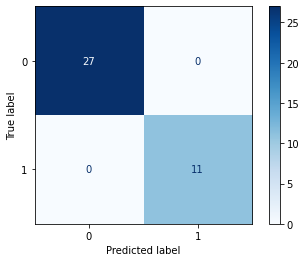

In [123]:
classification_results(dt, x_test, y_test)
plt.grid(False)

In [124]:
from sklearn.ensemble import RandomForestClassifier

Model Results: RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



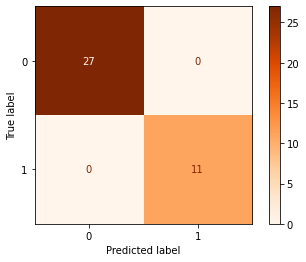

In [125]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
classification_results(rf, x_test, y_test, cmap='Oranges')
plt.grid(False)